# Praktikum 2 Intelligente Sensortsysteme
Tim Tiedemann, Thomas Lehmann, Tobias de Gasperis 

# Einfache intelligente Sensoren und Datenvorverarbeitung
Im Praktikum 2 geht es zum einen um die Eigenschaften eines ersten einfachen intelligenten Sensors, sowie eine erste Datenvorverarbeitung mittels Mikrocontroller.

Lesen Sie sich die Aufgaben gut durch. Sollten Sie eine Aufgabe nicht lösen können, so beschreiben Sie zumindest, wie weit Sie gekommen sind und auf welche Weise Sie vorgegangen sind. 

Die Aufgaben sind direkt hier als Protokoll zu bearbeiten. Das abgegebene Notebook soll ausführbar sein. Daneben ist der PDF-Export des Notebook mit abzugeben.

Autoren des Protokolls: Khanh Nhu Pham, Berivan Elmas

# Hintergrund

Bewegungssensoren sind inzwischen trotz ihrer Komplexität Massenware und finden sich in verschiedenen Anwendungen. Als Beispiele sollen in diesem Praktikum ein Joystick und eine Alarmanlage auf Basis von Bewegungssensoren als Sensorsystem entwickelt werden. Dazu soll zunächst das Verhalten dieser Sensoren und die Kommunikation mit komplexeren Sensoren untersucht werden. 

Oftmals ergibt sich die Schwierigkeit, dass Daten nicht direkt verarbeitet werden können, sondern zwischengespeichert und später übertragen werden. Die dabei entstehenden Probleme und Lösungsansätze sollen ebenfalls untersucht werden.

Im Rahmen der folgenden Praktika sollen Bewegungsmuster oder Phasen der Bewegung automatisch erkannt und klassifiziert werden (Stichwort Gestenerkennung). Die hierfür benötigten Rohdaten für die nachfolgenden Analysen sollen hier gesammelt werden.

# Vorbereitungsaufgaben
## Beschleunigungs- und Gyroskop-Sensoren

Beschaffen Sie sich die Datenblätter zu den Sensoren ST LSM6DS0, LIS2DW12 und LIS2MDL. Welche Quellen für Datenblätter kennen Sie und welche haben Sie warum gewählt?

**Datenblätter**

- Es wurden die Herstellerseiten benutzt, da diese als die zuverlässigsten Quellen gewertet wurden.

Um was für Sensoren handelt es sich jeweils? Beschreiben Sie kurz die Funktionsweise und wichtigsten technischen Parameter, die für die Praktikumsaufgabe relevant sein könnten!

**Funktionsweise**

- Der LSM6DS0 ist ein 3D Beschleunigungsmesser und 3D Gyroskop, der eine genaue Erfassung der Beschleunigung und des Drehwinkels in allen drei Raumrichtungen ermöglicht.
- Der LIS2DW12 ist ein 3-Achsen-Beschleunigungsmesser, der eine hohe Genauigkeit und einen geringeren Stromverbrauch aufweist.
- Der LIS2MDL ist ein Magnetfeld-Sensor, welcher so konfiguriert werden kann, dass er durch Interrupts die Erkennung eines Magnetfeldes anzeigt signalisiert. Die Stärke des Magnetfeldes ist proportional zur Ausgangsspannung.

Über welche Kommunikationsschnittstelle(n) kann/können Messwerte der Sensoren (s.o.) ausgelesen werden. Wird/werden diese vom Mikrocontroller auf dem Nucleo-Board unterstützt? Können dafür bestimmte Funktionseinheiten innerhalb des Mikrocontrollers genutzt werden?

**Schnittstellen**

- Die Schnittstellen der Sensoren sind I2C und SPI, beides wird auch vom Mikrocontroller unterstützt.
- DMA, um die Latenz der Datenauslesung durch direkten Speicherzugriff zu reduzieren. Die Datenübertragungsrate wird erhöht.

## Einarbeitung in den Demo-Code
Analysieren Sie das über Git/EMIL/MS-Teams zur Verfügung gestellte Mikrocontroller-Projekt. Was wird da gemacht? Wo findet ein Zugriff auf die Sensoren statt? Wo die initiale Konfiguration der Mikrocontroller-internen Komponenten? An welcher Stelle werden vermutlich Zugriffe auf das “whoami”-Register durchgeführt? 

- Die Sensoren werden eingeschaltet und identifiziert. Die Werte der Achsen werden ausgewertet und ausgegeben.
- Die HW Zugriffe finden statt in ITS_BRD_Sensorik/Driver/BSP/Components.
- Die who_am_i Register werden in den jeweiligen _reg.c Dateien (in ITS_BRD_Sensorik/Driver/BSP/Components) ausgelesen. Der Zugriff erfolgt während der Initialisierung der jeweiligen Sensoren.

Insbesondere: Welche Kommunikationsschnittstelle verwenden die High-Level-Schnittstellen zu den Sensoren und an welcher Stelle wird diese konfiguriert? Somit auch an welchen Pins des Controllers sind die Sensoren angeschlossen?

- C:\Users\simge\ISSP\ITS_BRD_ISSP\ITS-BRD\ITS_BRD_Sensorik\Core\Src\stm32f4xx_nucleo_bus.c Z.433 ??

Optional: Verfolgen Sie im Praktikum per Debugger die Ausführung der Zugriffsfunktionen durch die Schichten der Bibliothek. Wo erfolgt wirklich der Zugriff auf den Kommunikationskanal?

**Analyseergebnis**

- Der Zugriff erfolgt auf den unteren Schichten in der Datei [...]_nucleo_bus.c, wo zunächst die Konfiguration der Pins stattfindet

# Im Labor

## Beschleunigungs- und Gyroskop-Sensoren – die üblichen IMU-Spielereien

### Analyse des Sensorverhaltens
Modifizieren Sie das gegebene Microkontroller-Programm derart, dass die Daten in einem CSV- Format ausgegeben werden (Trennung der Dimensionen per Komma oder Tabulator, ggf. konfigurierbar). Es reichen hier die Daten vom LSM6DS0, LIS2DW12 und LIS2MDL (also insgesamt 12 Werte je Zeile). Fügen Sie einen Codeauszug (wenige Zeilen) hier hinzu.

**Code-Sample**

    char* lineOfData = malloc(SIZE_OF_STRING*4);
    char s1[SIZE_OF_STRING] = {0};
    char s2[SIZE_OF_STRING] = {0};
    char s3[SIZE_OF_STRING] = {0};
    char s4[SIZE_OF_STRING] = {0};
    
    [...]
    
    while(1){
        acc_gyro.get_a_axes(axes);
        sprintf(s1, "%6d[acc/mg], %6d[acc/mg], %6d[acc/mg],", axes[0], axes[1], axes[2]); 
        acc_gyro.get_g_axes(axes);
        sprintf(s2, "%6d[gyro/mg], %6d[gyro/mg], %6d[gyro/mg],", axes[0], axes[1], axes[2]);

        accelerometer.get_a_axes(axes);
        sprintf(s3, "%6d[acc/mg], %6d[acc/mg], %6d[acc/mg],", axes[0], axes[1], axes[2]);
		
        magnetometer.get_m_axes(axes);
        sprintf(s4, "%6d[mag/mgauss], %6d[mag/mgauss], %6d[mag/mgauss]", axes[0], axes[1], axes[2]);
        sprintf(lineOfData, "%s, %s, %s, %s", s1, s2, s3, s4);
        printf("%s\r\n", lineOfData);
        lcdPrintlnS(lineOfData);
        
        [...]
    }

Werten Sie die ausgegebenen Beschleunigungs- und Gyroskopwerte aus: In welchem Bereich liegen diese, wenn das Board ruhig auf dem Tisch liegt? Ist der Bereich bei allen drei Achsen X/Y/Z jeweils gleich? Wie ändert sich die Ausgabe, wenn Sie das Board geneigt halten? Fügen Sie diesem Protokoll geeignete Plots von aufgezeichneten Daten hinzu, mit drei Achsen x/y/z von einem (oder mehreren) der Sensoren, aufgenommen während einer Bewegung wie z.B. “Ruhelage auf dem Tisch – Bewegung – Ruhelage auf dem Tisch”. Datendateien sind ebenfals abzugeben, so dass das Notebook ausführbar bleibt.

**Datenanalyse**

- Über 32 Samples lagen die Werte in der Ruhelage bei
    - DSOa_x: zwischen 1 bis 3, Schnitt = 2,25
    - DSOa_y: zwischen 3 bis 5, Schnitt = 4,41
    - DSOa_z: zwischen 1018 und 1020, Schnitt = 1019,41
    - DSOg_x: entweder 210 oder 140, Schnitt = 194,69
    - DSOg_y: entweder 70 oder 140, Schnitt = 94,06
    - DSOg_z: entweder 910 oder 980, Schnitt = 929,69
    - W12a_x: zwischen -2 und -4, Schnitt = -3,03
    - W12a_y: zwischen -27 und -33, Schnitt = -29,91
    - W12a_z: zwischen 999 und 1006, Schnitt = 1001,47
    - MDLm_x: zwischen -460 und -477, Schnitt = -468,16
    - MDLm_y: zwischen 565 und 588, Schnitt = 572,50
    - MDLm_z: zwischen -99 und -117, Schnitt = -116,09

Text(0.5, 0, 'z[mg]')

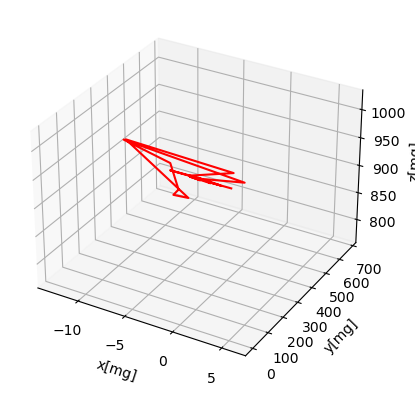

In [3]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import csv

def convert_colKey( colKey ):
    col = {}
    for key, value in colKey.items():
        keyAscii = key.encode('ascii', 'ignore' ).decode()
        valueAscii = value.encode('ascii','ignore').decode()
        col[ keyAscii ] = valueAscii
    return col

fig = plt.figure()
ax = plt.axes(projection='3d')

DSOa_x = []
DSOa_y = []
DSOa_z = []

genData = open('Daten45NeigungZurPerson.csv', 'r')
file = csv.DictReader(genData, delimiter=';')
    
for column in file:
    column = convert_colKey(column)
    DSOa_x.append(column['DSOax'])
    DSOa_y.append(column['DSOay'])
    DSOa_z.append(column['DSOaz'])
    
DSOa_x = np.array(DSOa_x, dtype = int)
DSOa_y = np.array(DSOa_y, dtype = int)
DSOa_z = np.array(DSOa_z, dtype = int)

#Messpunkte plotten
ax.plot3D(DSOa_x, DSOa_y, DSOa_z, 'red')

#Achsen beschriften
ax.set_xlabel('x[mg]')
ax.set_ylabel('y[mg]')
ax.set_zlabel('z[mg]')


Text(0.5, 0, 'z[mdps]')

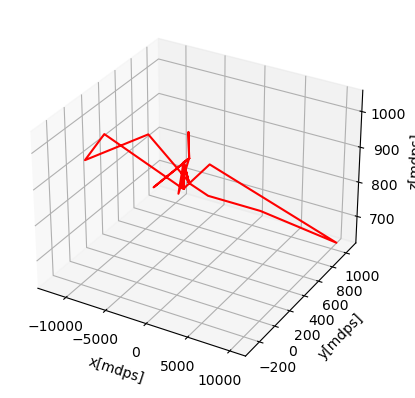

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

genData = open('Daten45NeigungZurPerson.csv', 'r')
file = csv.DictReader(genData, delimiter=';')

DSOg_x = []
DSOg_y = []
DSOg_z = []

for column in file:
    
    column = convert_colKey(column)
    DSOg_x.append(column['DSOgx'])
    DSOg_y.append(column['DSOgy'])
    DSOg_z.append(column['DSOgz'])
    
DSOg_x = np.array(DSOg_x, dtype = int)
DSOg_y = np.array(DSOg_y, dtype = int)
DSOg_z = np.array(DSOg_z, dtype = int)

ax.plot3D(DSOg_x, DSOg_y, DSOg_z, 'red')
ax.set_xlabel('x[mdps]')
ax.set_ylabel('y[mdps]')
ax.set_zlabel('z[mdps]')

Text(0.5, 0, 'z[mg]')

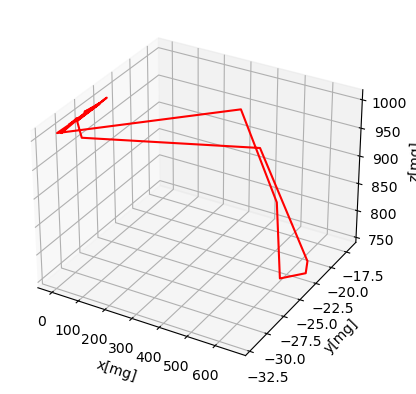

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

genData = open('Daten45NeigungZurPerson.csv', 'r')
file = csv.DictReader(genData, delimiter=';')

#hier muss noch angepasst werden
W12a_x = []
W12a_y = []
W12a_z = []

for column in file:
    column = convert_colKey(column)
    W12a_x.append(column['W12ax'])
    W12a_y.append(column['W12ay'])
    W12a_z.append(column['W12az'])
    
W12a_x = np.array(W12a_x, dtype = int)
W12a_y = np.array(W12a_y, dtype = int)
W12a_z = np.array(W12a_z, dtype = int)

ax.plot3D(W12a_x, W12a_y, W12a_z, 'red')
ax.set_xlabel('x[mg]')
ax.set_ylabel('y[mg]')
ax.set_zlabel('z[mg]')

Text(0.5, 0, 'z[mgauss]')

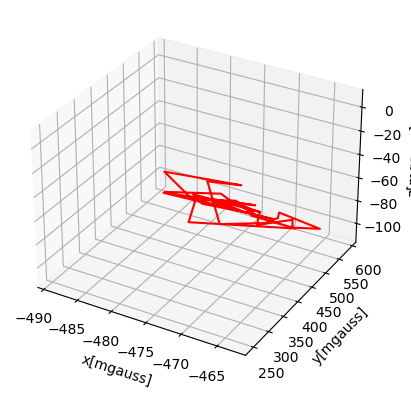

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

genData = open('Daten45NeigungZurPerson.csv', 'r')
file = csv.DictReader(genData, delimiter=';')

MDLm_x = []
MDLm_y = []
MDLm_z = []

for column in file:
    column = convert_colKey(column)
    MDLm_x.append(column['MDLmx'])
    MDLm_y.append(column['MDLmy'])
    MDLm_z.append(column['MDLmz'])
    
MDLm_x = np.array(MDLm_x, dtype = int)
MDLm_y = np.array(MDLm_y, dtype = int)
MDLm_z = np.array(MDLm_z, dtype = int)

ax.plot3D(MDLm_x, MDLm_y, MDLm_z, 'red')
ax.set_xlabel('x[mgauss]')
ax.set_ylabel('y[mgauss]')
ax.set_zlabel('z[mgauss]')

Überlegen Sie, wie Sie Beschleunigungswerte generieren könnten, die vom Betrag möglichst klein sind (gleichzeitig auf allen drei Achsen und über mehrere Samples hinweg). Wie können Sie dies erreichen? Welche Werte erreichen Sie? 

Hinweis: Sie können für Experimente auch ein Smartphone und die App “phyphox” der RWTH Aachen verwenden. Was erwarten Sie, was Sie währenddessen auf den drei Gyroskopachsen messen? Was messen Sie?

**Lösung**

- Den Sensor flach auf eine Oberfläche zu legen hält die Werte neutral und relativ konstant. Gerundet kommen die Achsen dann auf: x = 0g, y = 1g (wegen Erdbeschleunigung) und z = 0g
- Neigungen, Stöße etc meiden
- in bestimmten Intervallen Messwerte nehmen und evtl Mittelwerte bilden
- (Messfehler durch Kalibrierung minimieren)

## Anwendungsentwicklung
Es sollen die beiden Anwendungen Joystick und Alarmanlage entwickelt werden. Erstellen Sie vorab zwei Kopien des Projektes, in dennen Sie dann die Anwendungen entwickeln.

### Joystick
Verändern Sie die Ausgabe Ihres Microcontroller-Programms derart, dass das Board als User- Interface genutzt werden kann. Geben Sie beispielsweise einen “X”-Wert und einen “Y”-Wert eines simulierten Joysticks aus. Beide Ausgabewerte sollen in waagerechter Ausrichtung des Boards 0 sein und mit Neigung um eine Achse in eine Richtung positiv und in die andere Richtung derselben Achse negativ werden. Bei ungefähr 45° Neigung soll der Wert 45 ausgegeben werden.

?????????

Fügen Sie einen C-Codeauszug (wenige Zeilen) hier hinzu. Geben Sie die vollständige Source-Datei mit ab (ohne Projektdateien!).

**Code-Snippet**

void ComputeAngles()
{
  double roll  = atan2(accY, accZ) * RAD_TO_DEG;
  double pitch = atan(-accX / sqrt(accY * accY + accZ * accZ)) * RAD_TO_DEG;

  double gyroXrate = gyroX / 131.0; // Convert to deg/s
  double gyroYrate = gyroY / 131.0; // Convert to deg/s

  compAngleX = 0.98 * (compAngleX + gyroXrate * dt) + 0.02 * roll; // Calculate the angle using a Complimentary filter
  compAngleY = 0.98 * (compAngleY + gyroYrate * dt) + 0.02 * pitch;
}

### Alarmanlage
Konfigurieren Sie einen Trigger (Bewegungsschalter? Alarmanlage?), der bei Ruhelage des Boards 0 ist (oder keine Ausgabe generiert). Bei Bewegung aus der Ruhelage (entweder um/entlang allen Achsen oder nur um/entlang einer) soll eine 1 ausgegeben werden. Es soll weder “1”-Ausgaben in Ruhelage geben (“false positive”) noch “0”-Ausgaben bei Bewegung (“false negatives”). Fügen Sie einen C-Codeauszug (wenige Zeilen) hier hinzu. Geben Sie die vollständige Source-Datei mit ab (ohne Projektdateien!).

**Code-Snippet** 

## Kommunikationsanalyse
Beschaffen Sie sich den Schaltplan des Nucleo-Boards IKS01A3 (siehe EMIL-/MS-Teams- Raum). Fragen Sie ggf. die Laborassistenz.

An welchen Kontakten in ihrem Gesamtsystem können die Signale des I2C-Buses gemessen werden?

**Anschlüsse**

- SCL, SDA und GND am ITS-Board (I2C1, CN5)

Untersuchen Sie den Zugriff auf das Who-Am-I-Register eines Sensors. 
Führen Sie eine Messung des Zugriffs mit dem Oszilloskop durch und betrachten Sie einen Bustransfer. Wie wird der Sensor hier angesprochen? Wie antwortet der Sensor? Fügen Sie einen “Screen Shot” der Übertragung hier mit ein. Analysieren Sie die Signale nach dem Protokollstandard und ergänzen Sie Ihre Ergebnisse (Bits etc.) in dem Signalverlauf.

Hinweis: Es müssen ggf. mehrere Messungen durchgeführt werden und zu einem Screen Shot zusammengesetzt werden.

**Protokollanalyse**

- Beim Auslesen gibt das Who-Am-I Register gibt eine Sensor-ID zurück. Bei dem LSM6DS0 wäre die ID beispielsweise 8, was auch bei der Messung mit dem Oszilloskop erkennbar ist (s. Anhang "Abb.1: Oszilloskop/Messung mit GyroAcc-Sensor"). Diese ID steht im Kontrollbyte der Übertragenen Daten.


Welche Datenrate im Sinne von Messungen/s (Datenzeile/s) kann Ihr Gesamtsystem über die serielle Schnittstelle (RS232) in der Konfiguration aus der Teilaufgabe "Analyse des Sensorverhaltens" zum Host maximal übertragen? Kein Delay im Programm. Schätzen Sie den Wert begründet ab.

**Datenrate**

## Feature-Generation / -Selection

### Data Buffer
Im Folgenden sollen Messwerte zunächst lokal auf dem Mikrocontroller gesammelt und dann getrennt weiterverarbeitet werden. Ändern Sie Ihr Mikrocontroller-Programm (am besten als neue C-Datei oder neues Projekt bzw. sichern Sie die C-Datei aus der letzten Aufgabe). Die Messwerte sollen in einem Puffer gesammelt werden, ohne diese gleich an den Host-PC zu übertragen. Die Puffergröße soll dabei (zur Compile-Zeit) konfigurierbar sein. Sie brauchen mindestens 1024 Samples von

1. den drei Beschleunigungsachsen des LIS2DW12, 
2. den drei Beschleunigungsachsen des LSM6DS0,
3. den drei Gyroskopachsen des LSM6DS0,
4. den drei Magnetometerachsen des LIS2MDL

(also insgesamt mindestens 1024 * 12 Integerwerte). Geben Sie danach den Inhalt des Pufferspeichers (alle mindestens 1024 12-dimensionalen Samples) in einem CSV-kompatiblen Format über die serielle Schnittstelle aus. Implementieren Sie beide Speicherzugriffe (Messwerte speichern und Daten ausgeben) innerhalb derselben Funktion (main oder eine andere).

Entfernen Sie den Aufruf “wait(1.5);”, falls noch nicht geschehen. Wiederholen Sie den Ablauf Datensammlung–Datenausgabe in einer Endlosschleife. Stellen Sie die Baudrate von mindestens 115.200 Baud ein. Fügen Sie einen Codeauszug hier hinzu-

**Code Snippet**

	while (1) {
        for(int i = 0; i < NUM_OF_SAMPLES; i++ ){
                acc_gyro.get_a_axes(axes);
                buffer[i][0] = axes[0];
                buffer[i][1] = axes[1];
                buffer[i][2] = axes[2];
                acc_gyro.get_g_axes(axes);
                buffer[i][3] = axes[0];
                buffer[i][4] = axes[1];
                buffer[i][5] = axes[2];
                accelerometer.get_a_axes(axes);
                buffer[i][6] = axes[0];
                buffer[i][7] = axes[1];
                buffer[i][8] = axes[2];
                magnetometer.get_m_axes(axes);
                buffer[i][9] = axes[0];
                buffer[i][10]= axes[1];
                buffer[i][11]= axes[2];
           }

           for(int i = 0; i < NUM_OF_SAMPLES; i++ ){
                for (int n = 0; n < NUM_OF_VALUES-1; n++){
                    printf("%6d;", buffer[i][n]);
                }
                printf("%6d\r\n", buffer[i][NUM_OF_VALUES-1]);
           }
       }

Deklarieren Sie den Pufferspeicher einmal lokal (in der main- oder ggf. der eigenen Funktion) und ändern Sie die Größe auf 1.000.000 Samples. Kompilieren Sie das Programm. Ist dies möglich, was passiert? Wie groß ist der benötigte Speicher und wieviel Speicher steht in dem Mikrocontroller zur Verfügung?

**Ergebnis**

Das Programm läuft nicht mehr.

Deklarieren Sie den Pufferspeicher global und wiederholen Sie den Versuch, einen 1.000.000 Samples großen Zwischenspeicher zu verwenden. Was passiert nun?

**Ergebnis**

Das Programm kann auch nicht mehr ausgeführt werden.

### Sampling Duration
Fügen Sie Ihrem Programm ein LED-Objekt hinzu. Alternativ zur mbed- Dokumentation (s.o.) können Sie sich auch das Nucleo-“Hello World”-Beispiel “Blink LED” anschauen. Fragen Sie ggf. Ihre Laborassistenz.
Schalten Sie die “LED1” ein, bevor Sie Messdaten in den Pufferspeicher einlesen. Schalten Sie sie wieder aus, bevor Sie die Daten über die serielle Schnittstelle ausgeben. Messen Sie die Zeitdauer für das Einlesen der Daten mittels Oszilloskop.

**Zeitdauer**

- 96.76 kHz

(s. Anhang "Abb.2: Oszilloskop Zeit")

### Timestaps
Nicht jeder Schleifenduchlauf ist gleich lang und oftmals benötigt mann eine genaue Information darüber wann die Daten (Sampling) erfasst wurden.

Fügen Sie Ihrem Programm einen Timer hinzu. Suchen Sie Informationen hierzu und fragen Sie ggf. Ihre Laborassistenz. 

Erfassen Sie den Timerstand (in $\mu s$) vor Beginn des Messwertauslesens. Speichern Sie die einzelnen Zeitstempel mit im Puffer der Sensordaten. Geben Sie entsprechend zu Beginn jeder CSV-Zeile einmal den jeweiligen Zeitstempel mit aus.

In welchem Bereich liegt die Zeitdifferenz von einem zum folgenden Sample? Ist der Wert konstant? Wenn ja, in welchem Bereich variiert er? Geben Sie den Datensatz und den Code mit ab.

**Zeitanalyse**

    initTimer();
	int cnt = 0;
	while (1) {
		
		cnt = cnt +1;
		
		printf("\r\n\n\n\n\n\n");
		printf("Messung: cnt = %d \r\n",cnt);
		
		GPIOD->ODR = 0x01;
		for(int i = 0; i < NUM_OF_SAMPLES; i++ ){
			acc_gyro.get_a_axes(axes);
			buffer[i][0] = getTimeStamp();
			buffer[i][1] = axes[0];
			buffer[i][2] = axes[1];
			buffer[i][3] = axes[2];
			acc_gyro.get_g_axes(axes);
			buffer[i][4] = axes[0];
			buffer[i][5] = axes[1];
			buffer[i][6] = axes[2];
			accelerometer.get_a_axes(axes);
			buffer[i][7] = axes[0];
			buffer[i][8] = axes[1];
			buffer[i][9] = axes[2];
			magnetometer.get_m_axes(axes);
			buffer[i][10] = axes[0];
			buffer[i][11]= axes[1];
			buffer[i][12]= axes[2];
		}
		
		GPIOD->ODR = 0x00;
		
		
		for(int i = 0; i < NUM_OF_SAMPLES; i++ ){
			for (int n = 0; n < NUM_OF_VALUES-1; n++){
				printf("%6d;", buffer[i][n]);
			}
			printf("%6d\r\n", buffer[i][NUM_OF_VALUES-1]);
		}
	}

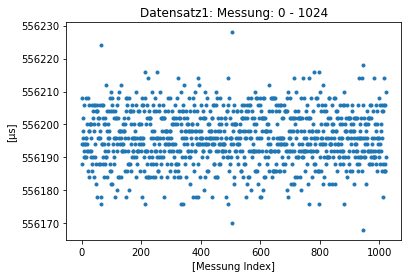

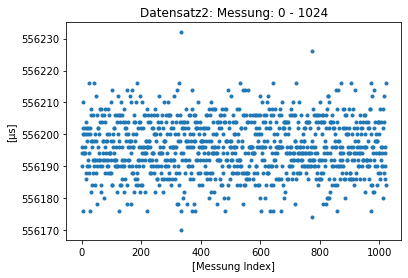

In [26]:
# import of the Sensor data
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt("Datensätze/Datensatz1.csv", delimiter=";", skip_header=1)

time_diff = np.arange(1023)

i = 0
j = 1
while i < np.size(time_diff):
    time_diff[i] = data[j][0] - data[i][0]
    i+=1
    j+=1

x = np.arange(0,1023, 1)  # Start, Stop, Step
plt.plot(x,time_diff[x],'.')
plt.title("Datensatz1: Messung: 0 - 1024")
plt.xlabel("[Messung Index]")
plt.ylabel("[µs]")
plt.show()



data2 = np.genfromtxt("Datensätze/Datensatz3.csv", delimiter=";", skip_header=1)

time_diff2 = np.arange(1023)

i2 = 0
j2 = 1
while i2 < np.size(time_diff):
    time_diff[i2] = data2[j2][0] - data2[i2][0]
    i2+=1
    j2+=1

x2 = np.arange(0,1023, 1)  # Start, Stop, Step
plt.plot(x2,time_diff[x2],'.')
plt.title("Datensatz2: Messung: 0 - 1024")
plt.xlabel("[Messung Index]")
plt.ylabel("[µs]")
plt.show()


## Beispieldatensätze für Klassifikationen
Für das folgende Praktikum benötigen wir mehrere Testdatensätze (siehe unten) (jeweils mindestens 1024 direkt nacheinander aufgenommene Samples lang). Mit Hilfe der LED kann dabei beobachtet werden, wie lange das Füllen des Puffers dauert, so dass die Bewegungen jeweils immer innerhalb dieser Zeit abgeschlossen werden. Nehmen Sie folgende Datensätze auf:

1. Nucleo-Board in Ruhelage auf dem Tisch
2. Nucleo-Board in Ruhelage, dann Drehung zum Aufrichten, Nucleo-Board in Ruhe stehend, Drehung zurück in Liegeposition und wieder in Ruhelage
3. Nucleo-Board in Ruhelage, gradlinige Bewegung in eine Richtung hin und wieder zurück
4. Nucleo-Board in Ruhelage, dann mehrmals gradlinige Bewegung in eine Richtung und wieder zurück
5. Nucleo-Board in Ruhelage, dann unterschiedliche gradlinige und rotatorische Bewegungen – aber alle “liegend” auf dem Tisch, das heißt in einer Ebene
6. Nucleo-Board in Ruhelage, dann diverse unterschiedliche Bewegungen (gradlinig und rotatorisch) über alle drei Raumachsen

Schauen Sie sich den ersten und den zweiten aufgenommenen Datensatz (nach der Liste oben) an. Verhalten sich alle Sensorwerte so, wie Sie es erwartet haben? Wenn nein, welche nicht? Haben Sie eine Vermutung warum nicht? Wenn ja, warum sehen die Messkurven gerade so aus? 

Fügen Sie Ihrem Protokoll zwei interessante Plots hinzu. Geben Sie an, an welchen Stellen/in welchen Bereichen welche Bewegung ausgeführt wurde.

Hinweis: Dokumentieren/skizzieren Sie bei den komplexeren Bewegungen (3./4./5.) Ihre Bewegungsmuster, da später die Daten den Bewegungsabschnitten zugeordnet werden sollen.

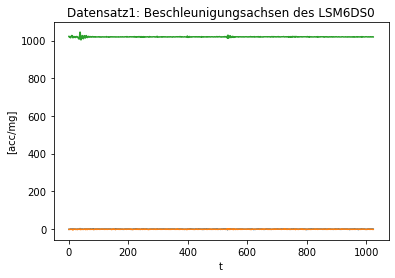

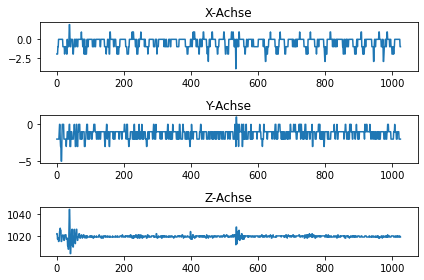

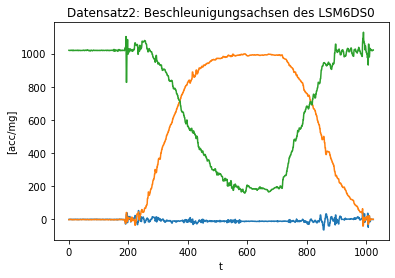

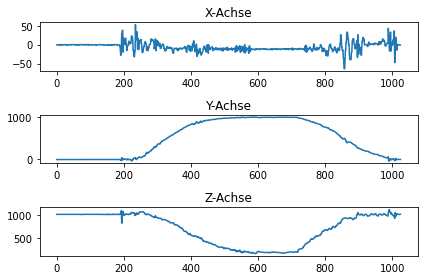

In [41]:
data = np.genfromtxt("Datensätze/Datensatz1.csv", delimiter=";")

# Plot of the LSM6DS0
plt.plot(data[:,1:4])
plt.title("Datensatz1: Beschleunigungsachsen des LSM6DS0")
plt.xlabel("t")
plt.ylabel("[acc/mg]")
plt.show()

plt.subplot(311) 
plt.plot(data[:,1])
plt.title('X-Achse')
plt.subplot(312) 
plt.plot(data[:,2])
plt.title('Y-Achse')
plt.subplot(313) 
plt.plot(data[:,3])
plt.title('Z-Achse')
plt.tight_layout()
plt.show()



data = np.genfromtxt("Datensätze/Datensatz2.csv", delimiter=";")

# Plot of the LSM6DS0
plt.plot(data[:,1:4])
plt.title("Datensatz2: Beschleunigungsachsen des LSM6DS0")
plt.xlabel("t")
plt.ylabel("[acc/mg]")
plt.show()

plt.subplot(311) 
plt.plot(data[:,1])
plt.title('X-Achse')
plt.subplot(312) 
plt.plot(data[:,2])
plt.title('Y-Achse')
plt.subplot(313) 
plt.plot(data[:,3])
plt.title('Z-Achse')
plt.tight_layout()
plt.show()